#### Importation des library

In [1]:
# Bibliothèques importantes pour l'analyse des séries temporelles
import numpy as np                   # Pour les calculs numériques et la génération de données
import pandas as pd                  # Pour manipuler les données sous forme de tableaux (DataFrame)
import matplotlib.pyplot as plt      # Pour tracer des graphiques et visualiser les séries temporelles
from statsmodels.tsa.seasonal import seasonal_decompose  # Pour décomposer automatiquement la série en tendance, saisonnalité et bruit


#### Importation des données

In [2]:
df = pd.read_csv("1_ventes_glaces.csv", parse_dates=['Date'], index_col='Date')

In [7]:
df.head()

,Ventes Totales,Tendance,Saisonnalité,Bruit
Date,,,,
2025-01-05,52.483571,NaN,-3.263924,NaN
2025-01-12,52.019412,NaN,5.643672,NaN
2025-01-19,58.624756,NaN,10.211171,NaN
2025-01-26,65.607247,NaN,11.968850,NaN
2025-02-02,59.323697,NaN,5.187554,NaN


In [10]:
df.shape

(104, 4)

In [9]:
df.describe()

,Ventes Totales,Tendance,Saisonnalité,Bruit
count,104.000000,52.000000,1.040000e+02,5.200000e+01
mean,64.807420,64.854545,3.416071e-17,2.075106e-01
std,14.567203,4.988873,1.553254e+01,3.497902e-16
min,31.882813,56.653701,-2.794077e+01,2.075106e-01
25%,56.838047,60.271846,-1.530084e+01,2.075106e-01
50%,64.125466,65.101783,-2.044744e+00,2.075106e-01
75%,74.036801,69.246988,1.367896e+01,2.075106e-01
max,96.281200,72.924772,2.652248e+01,2.075106e-01


In [8]:
df.isnull().sum()

Ventes Totales     0
Tendance          52
Saisonnalité       0
Bruit             52
dtype: int64

### Décomposition de la série en Tendance et saison

In [3]:
# Décomposition automatique
decomposition = seasonal_decompose(df['Ventes Totales'], model='additive', period=52)
df['Tendance'] = decomposition.trend
df['Saisonnalité'] = decomposition.seasonal
df['Bruit'] = decomposition.resid

### Graphique de la série

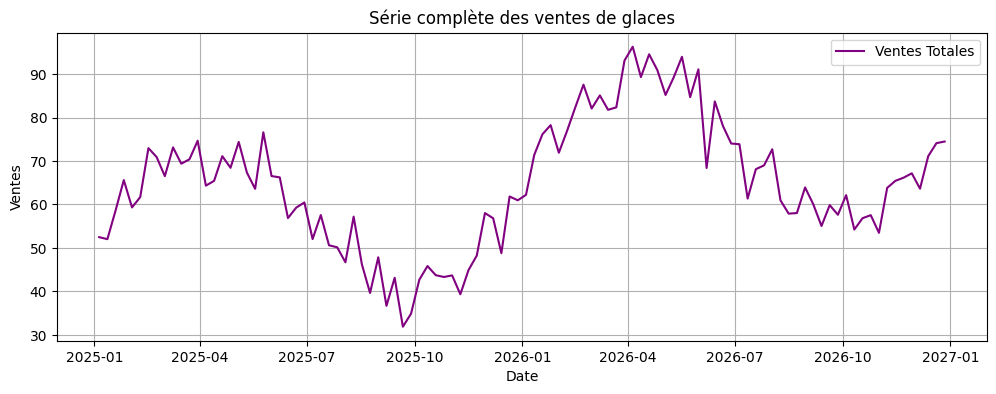

In [4]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df['Ventes Totales'], color='purple', label='Ventes Totales')
plt.title("Série complète des ventes de glaces")
plt.xlabel("Date")
plt.ylabel("Ventes")
plt.grid(True)
plt.legend()
plt.show()

### Série avec la tendance mise en évidence

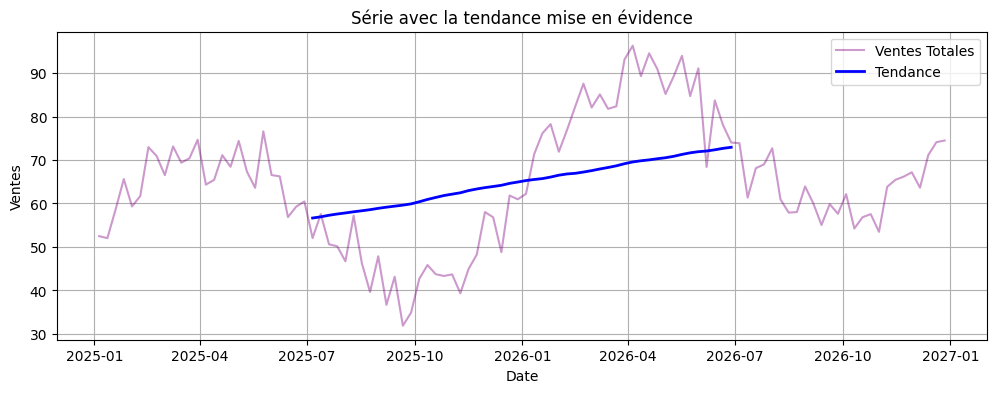

In [5]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df['Ventes Totales'], color='purple', alpha=0.4, label='Ventes Totales')
plt.plot(df.index, df['Tendance'], color='blue', linewidth=2, label='Tendance')
plt.title("Série avec la tendance mise en évidence")
plt.xlabel("Date")
plt.ylabel("Ventes")
plt.grid(True)
plt.legend()
plt.show()

### Série avec tendance + saisonnalité + bruit

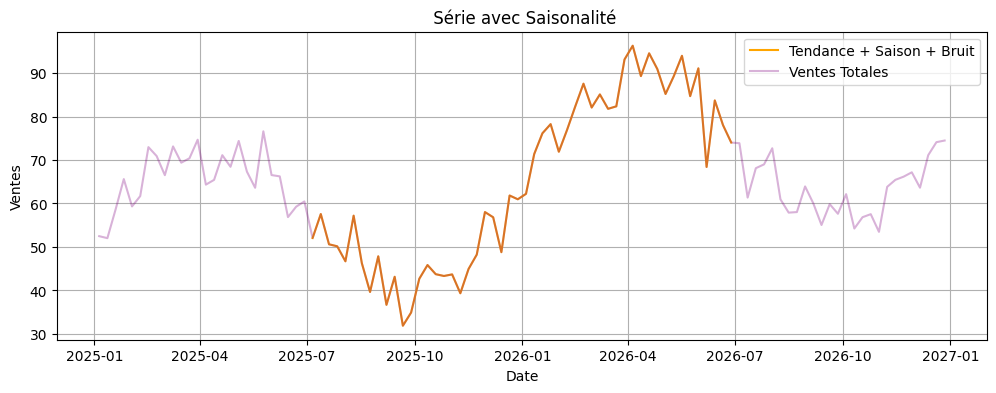

In [6]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df['Tendance'] + df['Saisonnalité'] + df['Bruit'], color='orange', label='Tendance + Saison + Bruit')
plt.plot(df.index, df['Ventes Totales'], color='purple', alpha=0.3, label='Ventes Totales')
plt.title(" Série avec Saisonalité")
plt.xlabel("Date")
plt.ylabel("Ventes")
plt.grid(True)
plt.legend()
plt.show()